In [534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [535]:
df = pd.read_csv('loan_data_set.csv')

In [536]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [537]:
df.shape

(614, 13)

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [539]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [540]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [541]:
df = df.dropna()

In [542]:
df.shape

(480, 13)

In [543]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [544]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [545]:
df.Loan_Status.value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [546]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df.iloc[:, 12] = encoder.fit_transform(df.iloc[:, 12])

In [547]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [548]:
df_majority = df[df['Loan_Status'] == 1]
df_minority = df[df['Loan_Status'] ==0]

In [549]:
df_majority.shape

(332, 13)

In [550]:
df_minority.shape

(148, 13)

In [551]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))

In [552]:
df = pd.concat([df_minority, df_majority_downsampled])

In [553]:
df.shape

(296, 13)

In [554]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,0
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0


In [555]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='Gender', ylabel='count'>

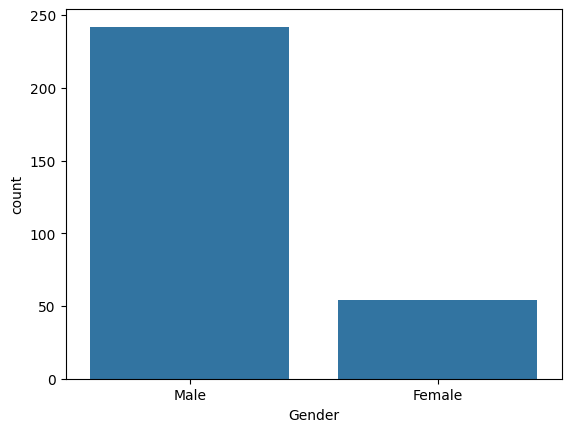

In [556]:
sns.countplot(x = df['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

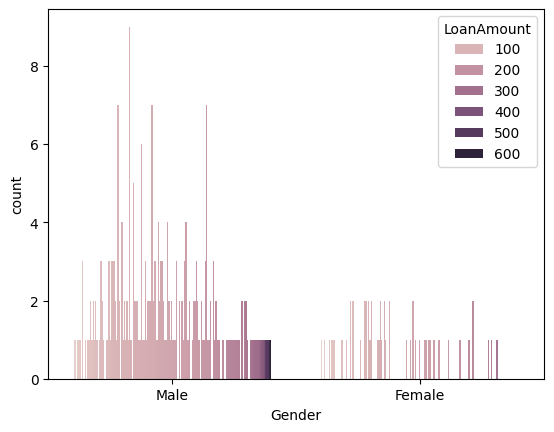

In [557]:
sns.countplot(x = df['Gender'], data=df, hue=df['LoanAmount'])

In [558]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,1
1,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
2,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
3,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,1
4,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,0


<Axes: xlabel='Married', ylabel='count'>

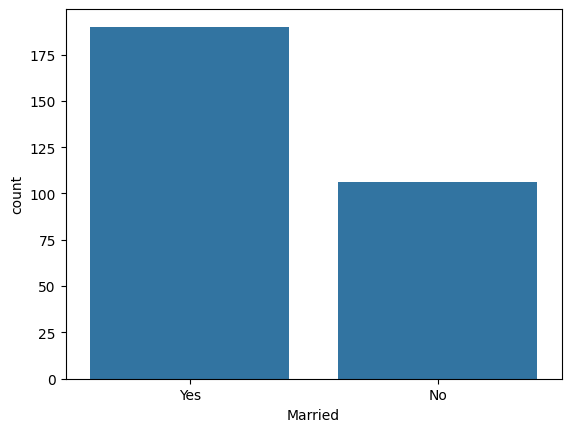

In [559]:
sns.countplot(x= df['Married'])

In [560]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,1
1,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
2,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
3,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,1
4,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,0


In [561]:
df.Dependents.value_counts()

Dependents
0     169
1      53
2      49
3+     25
Name: count, dtype: int64

In [562]:
df = df.replace(to_replace=  '3+' , value= 4)

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\3094401516.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace=  '3+' , value= 4)


In [563]:
df.Dependents.value_counts()

Dependents
0    169
1     53
2     49
4     25
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

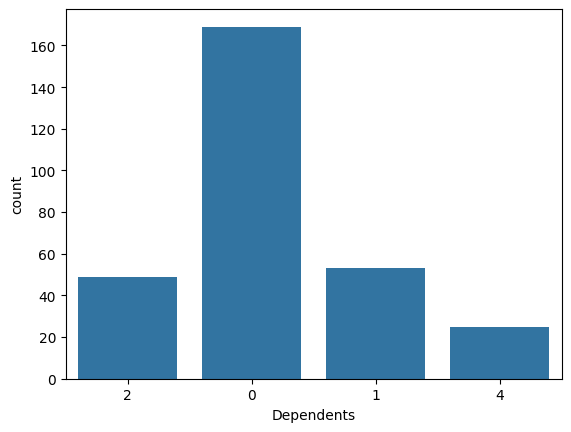

In [564]:
sns.countplot(x = df['Dependents'])

In [565]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,1
1,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,0
2,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
3,LP002175,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,1
4,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,0


<Axes: xlabel='Education', ylabel='count'>

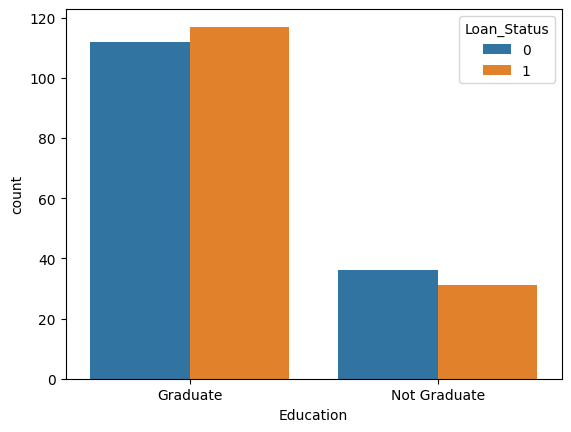

In [566]:
sns.countplot(x= 'Education', hue= 'Loan_Status', data = df)

<Axes: xlabel='Married', ylabel='count'>

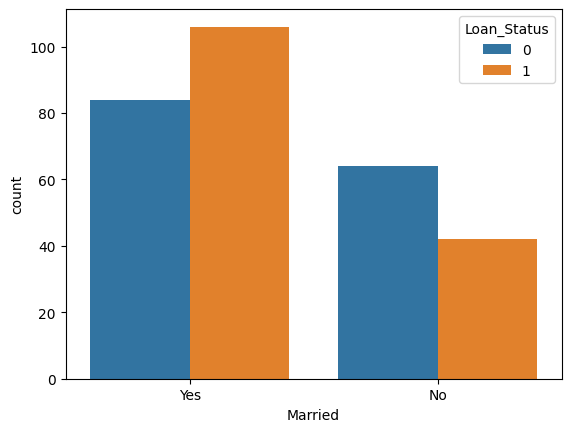

In [567]:
sns.countplot(x= 'Married', hue= 'Loan_Status', data = df)

<Axes: xlabel='Dependents', ylabel='count'>

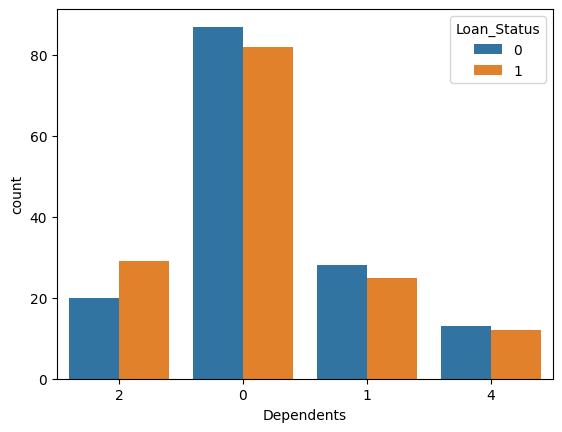

In [568]:
sns.countplot(x= 'Dependents', hue= 'Loan_Status', data = df)

<Axes: xlabel='Self_Employed', ylabel='count'>

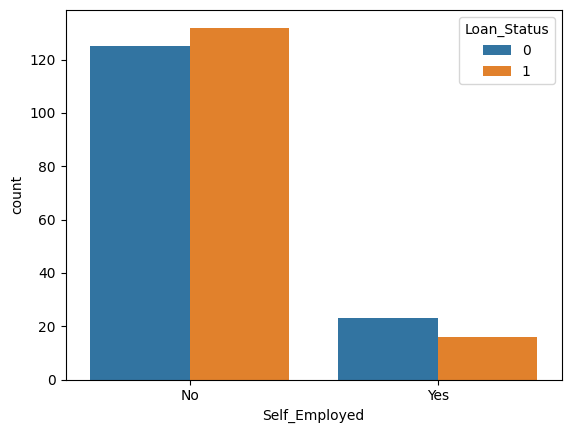

In [569]:
sns.countplot(x= 'Self_Employed', hue= 'Loan_Status', data = df)

In [570]:
df['Married'] = df['Married'].replace({'No' :0, 'Yes' :1})

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\2876660853.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married'] = df['Married'].replace({'No' :0, 'Yes' :1})


In [571]:
df['Gender'] = df['Gender'].replace({'Male' :1, 'Female' :0})

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\2201443200.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male' :1, 'Female' :0})


In [572]:
df['Self_Employed'] = df['Self_Employed'].replace({'Yes' :1, 'No' :0})

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\29086976.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Self_Employed'] = df['Self_Employed'].replace({'Yes' :1, 'No' :0})


In [573]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002868,1,1,2,Graduate,0,3159,461.0,108.0,84.0,1.0,Urban,1
1,LP001164,0,0,0,Graduate,0,4230,0.0,112.0,360.0,1.0,Semiurban,0
2,LP002305,0,0,0,Graduate,0,4547,0.0,115.0,360.0,1.0,Semiurban,1
3,LP002175,1,1,0,Graduate,0,4750,2333.0,130.0,360.0,1.0,Urban,1
4,LP001528,1,0,0,Graduate,0,6277,0.0,118.0,360.0,0.0,Rural,0


In [574]:
df['Education'] = df['Education'].replace({'Graduate' :1, 'Not Graduate' :0})

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\1944440845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({'Graduate' :1, 'Not Graduate' :0})


In [575]:
df.Property_Area.value_counts()

Property_Area
Semiurban    107
Urban         99
Rural         90
Name: count, dtype: int64

In [576]:
df['Property_Area'] = df['Property_Area'].replace({'Rural' :0, 'Semiurban' :1, 'Urban':2})

C:\Users\adpub\AppData\Local\Temp\ipykernel_19396\471353831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Property_Area'] = df['Property_Area'].replace({'Rural' :0, 'Semiurban' :1, 'Urban':2})


In [577]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002868,1,1,2,1,0,3159,461.0,108.0,84.0,1.0,2,1
1,LP001164,0,0,0,1,0,4230,0.0,112.0,360.0,1.0,1,0
2,LP002305,0,0,0,1,0,4547,0.0,115.0,360.0,1.0,1,1
3,LP002175,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,2,1
4,LP001528,1,0,0,1,0,6277,0.0,118.0,360.0,0.0,0,0


In [578]:
df = df.drop('Loan_ID',axis=1)

In [579]:
X = df.iloc[:, :-1]
Y= df.iloc[:, -1]

In [580]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,1,0,3159,461.0,108.0,84.0,1.0,2
1,0,0,0,1,0,4230,0.0,112.0,360.0,1.0,1
2,0,0,0,1,0,4547,0.0,115.0,360.0,1.0,1
3,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,2
4,1,0,0,1,0,6277,0.0,118.0,360.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
291,1,0,0,0,0,6216,0.0,133.0,360.0,1.0,0
292,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
293,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,2
294,1,1,0,0,0,4188,0.0,115.0,180.0,1.0,1


In [581]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
291    0
292    0
293    0
294    1
295    1
Name: Loan_Status, Length: 296, dtype: int64

In [582]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [583]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [584]:
X_train.shape

(207, 11)

In [585]:
Y_train.shape

(207,)

In [586]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [587]:
Y_pred = model.predict(X_test)

In [588]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, Y_pred)
score

0.7078651685393258

In [589]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
}

In [590]:
params

{'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2'],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'class_weight': [None, 'balanced']}

In [591]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

rscv = RandomizedSearchCV(estimator= model, param_distributions=params ,scoring="accuracy", cv= 5, n_jobs=-1 )

In [592]:
rscv.fit(X_train, Y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [593]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'bootstrap': True}

In [594]:
rscv.best_score_

np.float64(0.767828106852497)

In [596]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(Y_test, lr_pred))

0.6966292134831461


In [597]:
paramslr ={
    'solver'  : ['lbfgs', 'liblinear', 'saga', 'saga'],
    'penalty' : ['l2', 'l1'],
    'multi_class' :['auto', 'ovr', 'multinomial']
}

In [598]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
randomcv = RandomizedSearchCV(lr, param_distributions=paramslr, scoring='accuracy', n_jobs=-1, cv = 5 )

In [599]:
randomcv.fit(X_train, Y_train)

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\sklearn\

,estimator,LogisticRegression()
,param_distributions,"{'multi_class': ['auto', 'ovr', ...], 'penalty': ['l2', 'l1'], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [600]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr'}

In [601]:
randomcv.best_score_

np.float64(0.7192799070847851)

In [613]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', p =2, n_jobs=-1)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
print(accuracy_score(Y_test, knn_pred))

0.651685393258427
